In [75]:
import pandas as pd

## Reading Excel File 

In [76]:
train_data = pd.read_excel(r'C:\My_work\Python\Flightprice_prediction\Data_Train.xlsx')

## Display imported Excel File 

In [77]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


## diplay data types with info function 

In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## check for Nulls 

In [79]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Data points using shape function 

In [80]:
train_data.shape

(10683, 11)

## print rows of null values 

In [81]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## Drop a null row using dropana

In [82]:
train_data.dropna(inplace=True)

## Copy data from using copy function 

In [83]:
data = train_data.copy()

In [84]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


## Display data types using Dtypes 

## ML can understand only number 

In [85]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Define function to convert date using pandas 

In [86]:
def convert_into_datetime ( col):
    data[col]=pd.to_datetime(data[col])

## For Loop for chaning three columns 

In [87]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_into_datetime(i)

C:\Users\5971\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\5971\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\5971\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\5971\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\5971\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Provide 

In [88]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## to get column names using dataframe.columns

In [89]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Get min date from data frame 

In [90]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

## Get max date from data frame

In [91]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

## Extract day month and year from a datetime column 

In [92]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [93]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [94]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [95]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-10-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-06 05:50:00,2022-10-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


## Function to extract hour and minute from detature and arrival dates 

In [96]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [97]:
def fn_extract_hour_min(col):
    data[col+'_hour']=data[col].dt.hour 
    data[col+'_minute']=data[col].dt.minute

In [98]:
data.drop('Date_of_Journey',axis=1 , inplace= True)

In [99]:
fn_extract_hour_min('Dep_Time')

In [100]:
fn_extract_hour_min('Arrival_Time')

In [101]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-10-06 05:50:00,2022-10-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [102]:
def fn_depature_hour_category(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [103]:
data.dtypes

Airline                        object
Source                         object
Destination                    object
Route                          object
Dep_Time               datetime64[ns]
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Journey_year                    int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
dtype: object

## barchart and applying function to columns 

<AxesSubplot:>

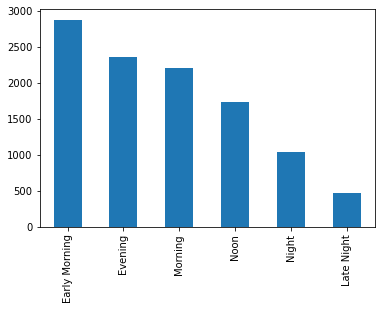

In [104]:
data['Dep_Time_hour'].apply(fn_depature_hour_category).value_counts().plot(kind='bar')

## interactive charts 

In [105]:
!pip install plotly

In [106]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


In [107]:
cf.go_offline()

In [108]:
data['Dep_Time_hour'].apply(fn_depature_hour_category).value_counts().iplot(kind='bar')

In [109]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [110]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [111]:
def fn_preprocessing_Duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [112]:
data['Duration'] =data['Duration'].apply(fn_preprocessing_Duration)

In [113]:
data['Duration_total_min'] =data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','').apply(eval)
    

In [114]:
import seaborn as sns

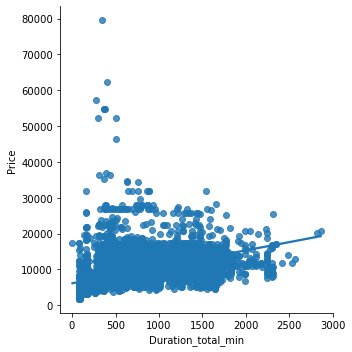

In [115]:
sns.lmplot(x='Duration_total_min',y='Price',data=data)

<AxesSubplot:ylabel='Destination'>

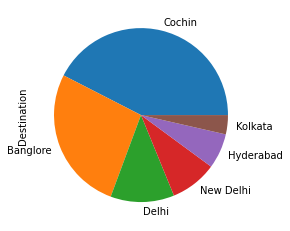

In [116]:
data['Destination'].value_counts().plot(kind='pie')

In [117]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [118]:
data[data['Airline']=="Jet Airways"]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-10-06 09:25:00,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-06 18:55:00,2022-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-06 08:00:00,2022-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-06 08:55:00,2022-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,2022-10-06 21:10:00,2022-05-10 09:20:00,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2022-10-06 11:40:00,2022-10-06 19:00:00,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-10-06 23:05:00,2022-06-28 19:00:00,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,2022-10-06 13:25:00,2022-05-28 04:25:00,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,2022-10-06 20:35:00,2022-03-13 21:20:00,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,1485


In [119]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Boxplot on Airline and price 

In [120]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


<AxesSubplot:xlabel='Airline', ylabel='Price'>

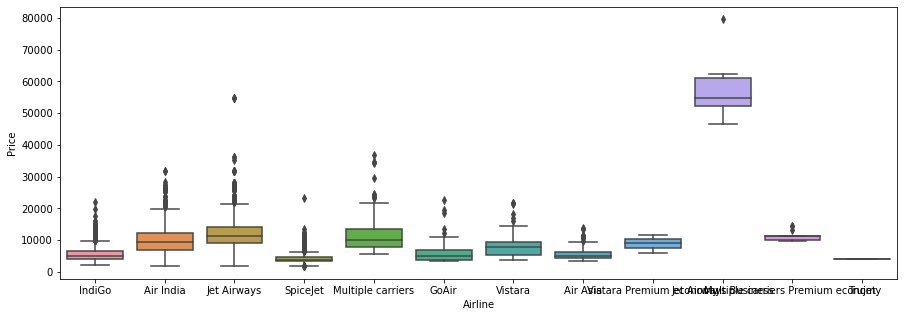

In [121]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=data)

## Violion plot on Airline and price ( Violoin plot used for distrubtion + box )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

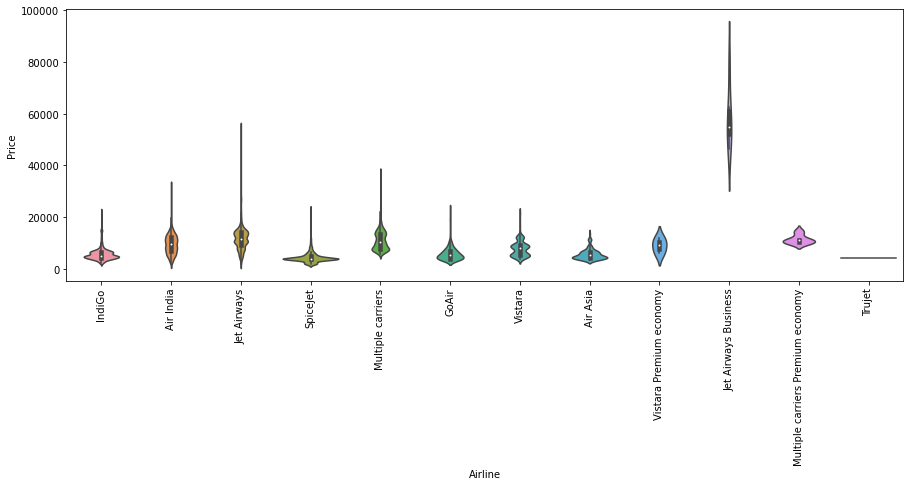

In [122]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Airline',y='Price',data=data)
plt.xticks(rotation='vertical')

## % calculation for addtional info

In [123]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_total_min'],
      dtype='object')

In [124]:
import numpy as np
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

## Droping mutiple columns which is not needed 

In [125]:
data.drop(columns=['Additional_Info','Route','Duration_total_min','Journey_year'],axis=1,inplace =True)

In [126]:
data.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,2022-10-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10


## Apply one hot encoding 

In [127]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [128]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [129]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x== category  else 0  )

In [130]:
data.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2022-10-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,24,3,22,20,1,10,1,0,0,0,0


In [131]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [132]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [133]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [134]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}